In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import *
from sklearn.metrics import *
from sklearn.model_selection import * 
from sklearn.linear_model import * 
from sklearn.tree import *
from sklearn.ensemble import * 


In [3]:
d = pd.read_csv('Flight_Booking.csv')
d.head()


,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


# Data Cleaning

In [6]:
d.drop(columns = ['Unnamed: 0'], inplace = True)

In [8]:
d.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [10]:
d.duplicated().sum()

0

In [11]:
d.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [14]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [16]:
d.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,300153.0,12.221021,7.191997,0.83,6.83,11.25,16.17,49.83
days_left,300153.0,26.004751,13.561004,1.00,15.00,26.00,38.00,49.00
price,300153.0,20889.660523,22697.767366,1105.00,4783.00,7425.00,42521.00,123071.00


In [18]:
d.shape

(300153, 11)

In [20]:
d.size

3301683

In [22]:
d.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

# Data Visualization

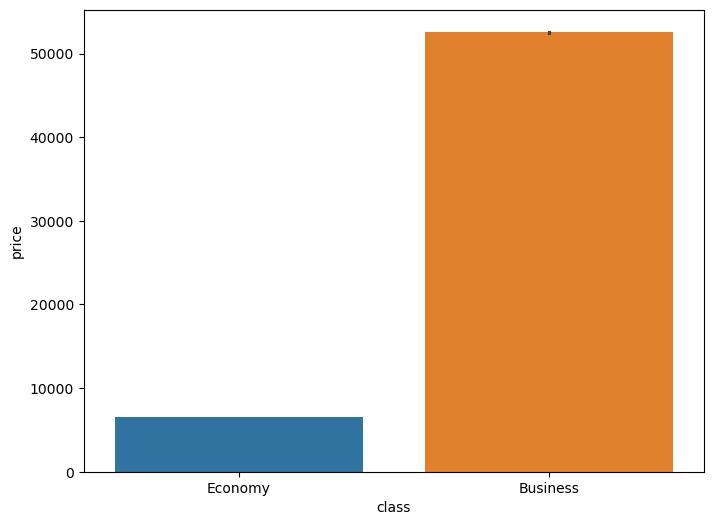

In [25]:
plt.figure(figsize=(8,6))
sns.barplot(data = d, x = 'class',y = 'price', hue = 'class')
plt.xlabel('class')
plt.ylabel('price')
plt.show()

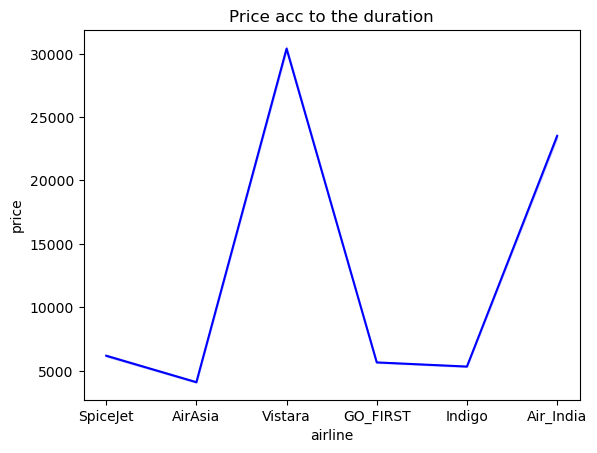

In [26]:
sns.lineplot(data=d,x = 'airline', y='price', color = 'blue')
plt.title('Price acc to the duration')
plt.xlabel('airline')
plt.ylabel('price')
plt.show()

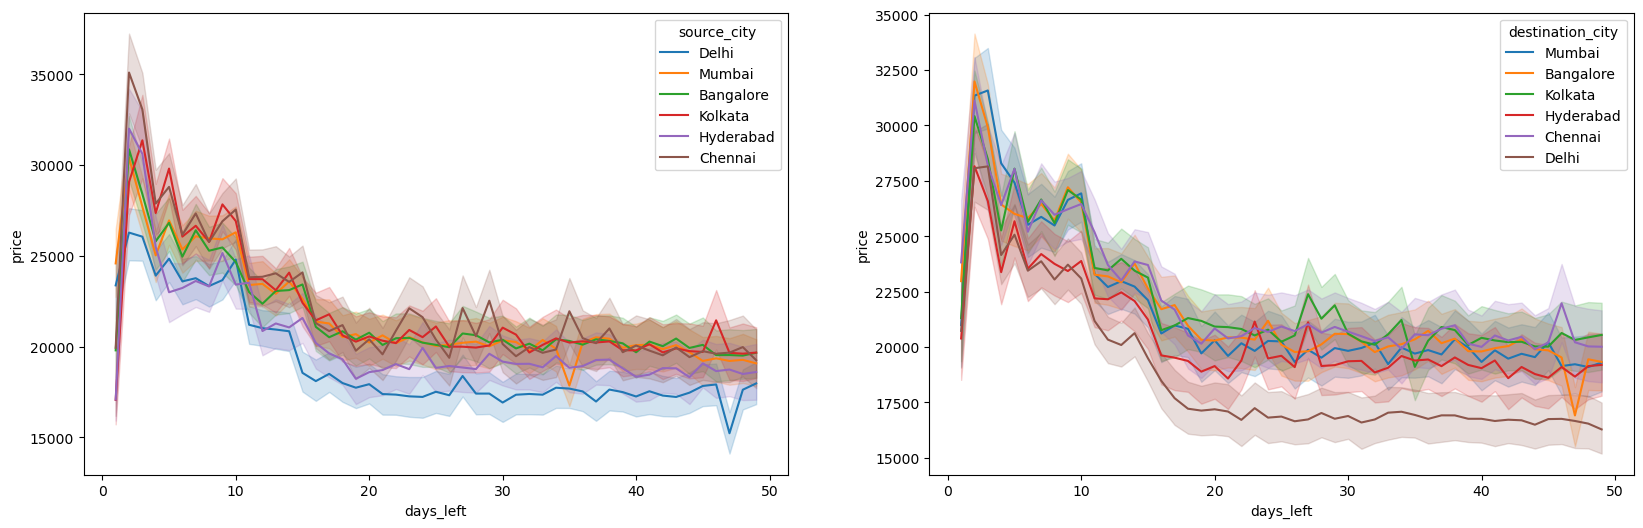

In [27]:
_,ax = plt.subplots(1,2,figsize=(20,6))
sns.lineplot(data = d, x = 'days_left', y = 'price', hue = 'source_city', ax = ax[0])
sns.lineplot(data = d, x = 'days_left', y = 'price', hue = 'destination_city', ax= ax[1])
plt.show()

Text(0, 0.5, 'price')

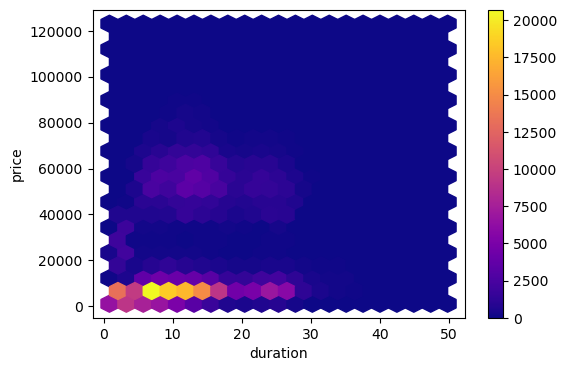

In [17]:
ax = d.plot.hexbin(x = 'duration', y = 'price', gridsize = 20, sharex = False, figsize = (6,4), cmap = 'plasma')
ax.set_xlabel('duration')
ax.set_ylabel('price')

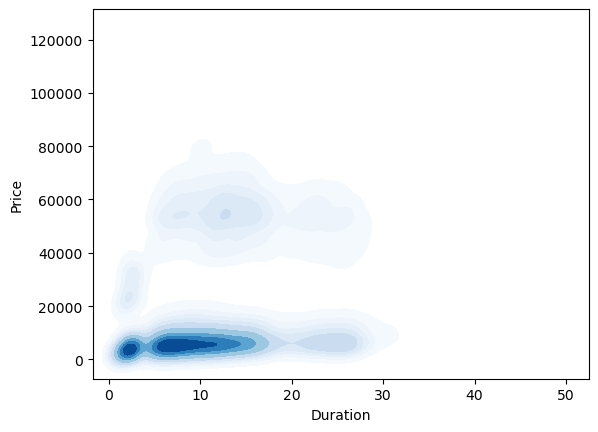

In [18]:
sns.kdeplot(x=d['duration'], y=d['price'], cmap="Blues", shade=True, thresh=0.05)
plt.xlabel('Duration')
plt.ylabel('Price')
plt.show()


In [ ]:
plt.figure(figsize=(20,20)) 
j = 1 
for i in d.columns[:8]:
    plt.subplot(4, 2, j)  
    sns.countplot(data=d, x=d[i], color = '#EEE8AA')
    plt.title(i)
    j += 1  

plt.tight_layout()  
plt.show()


# Label Encoding

In [32]:
lc = ['airline', 'source_city', 'departure_time', 'stops',
      'arrival_time', 'destination_city', 'class']
le = LabelEncoder()
for i in lc:
    d[i] = le.fit_transform(d[i])

In [34]:
d.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,SG-8709,2,2,2,5,5,1,2.17,1,5953
1,4,SG-8157,2,1,2,4,5,1,2.33,1,5953
2,0,I5-764,2,1,2,1,5,1,2.17,1,5956
3,5,UK-995,2,4,2,0,5,1,2.25,1,5955
4,5,UK-963,2,4,2,4,5,1,2.33,1,5955


# Feature Selection

In [37]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int32  
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  int32  
 3   departure_time    300153 non-null  int32  
 4   stops             300153 non-null  int32  
 5   arrival_time      300153 non-null  int32  
 6   destination_city  300153 non-null  int32  
 7   class             300153 non-null  int32  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int32(7), int64(2), object(1)
memory usage: 17.2+ MB


In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for i in d.columns:
    if ((d[i].dtype != 'object') & (i != 'price')):
        col_list.append(i)
x = d[col_list]
vd = pd.DataFrame()
vd['Feature'] = x.columns
vd['VIF'] = [variance_inflation_factor(x.values,i)
                for i in range(len(x.columns))]
print(vd)

            Feature       VIF
0           airline  3.393124
1       source_city  2.927766
2    departure_time  2.779427
3             stops  1.426614
4      arrival_time  3.684550
5  destination_city  2.885337
6             class  2.849370
7          duration  4.113876
8         days_left  3.976790


<Axes: >

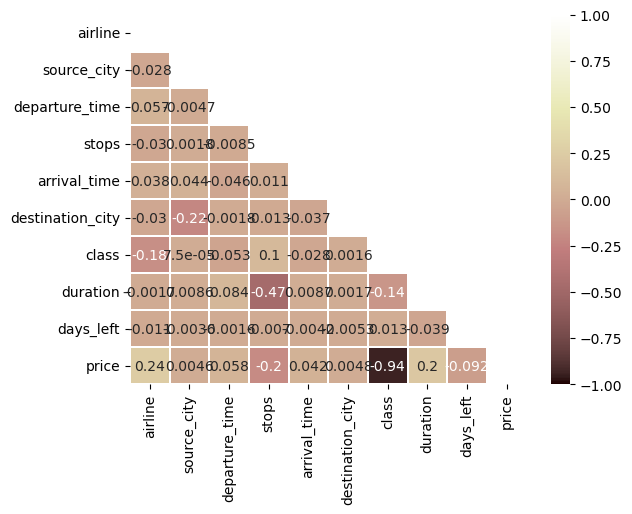

In [40]:
x = d.select_dtypes(include = 'number')
corr = x.corr()
corr = corr.fillna(0)
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.xticks(rotation=45)
plt.yticks(rotation=90)
sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, 
            annot=True, cmap='pink', linewidth=0.2, vmin=-1, vmax=1)

In [41]:
d.drop(columns=['flight'], inplace = True)


# indepedndent and dependent variables seperation

In [46]:
x = d.iloc[:,:-1]
y = d.iloc[:,-1]

# Model building

In [50]:
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 31)

# Linear Regression

In [53]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

In [55]:
diff = pd.DataFrame(np.c_[y_test,y_pred],columns=['Actual_values', 'Predicted_values'])
diff

,Actual_values,Predicted_values
0,2851.0,3127.926254
1,60232.0,51764.119684
2,4502.0,2772.783884
3,61649.0,49572.403550
4,1543.0,-2305.367669
...,...,...
60026,4197.0,6984.303565
60027,45097.0,54921.917848
60028,6122.0,7681.847581
60029,4234.0,6148.103814


In [57]:
r2 = r2_score(y_test,y_pred)*100
mae = mean_absolute_error(y_test,y_pred)
mape= mean_absolute_percentage_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse =root_mean_squared_error(y_test,y_pred)

In [59]:
r2

90.5430079482136

In [61]:
mae

4615.8240939938005

In [63]:
mape

0.436535270168556

In [65]:
mse

48509576.6866515

In [67]:
rmse

6964.881670685547

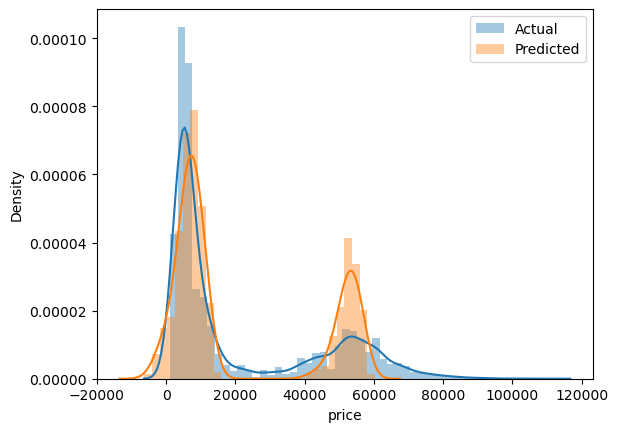

In [69]:
sns.distplot(y_test, label = 'Actual')
sns.distplot(y_pred, label = 'Predicted')
plt.legend()

# Decision Tree Regressor

In [71]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_preddt = dt.predict(x_test)

In [73]:
r2 = r2_score(y_test,y_preddt)*100
mae = mean_absolute_error(y_test,y_preddt)
mape= mean_absolute_percentage_error(y_test,y_preddt)
mse = mean_squared_error(y_test,y_preddt)
rmse =root_mean_squared_error(y_test,y_preddt)

In [74]:
r2

97.60925457233134

In [78]:
mae

1178.57263747064

In [80]:
mape

0.0745496814924398

In [82]:
mse

12263312.4810385

In [84]:
rmse

3501.9012666034005

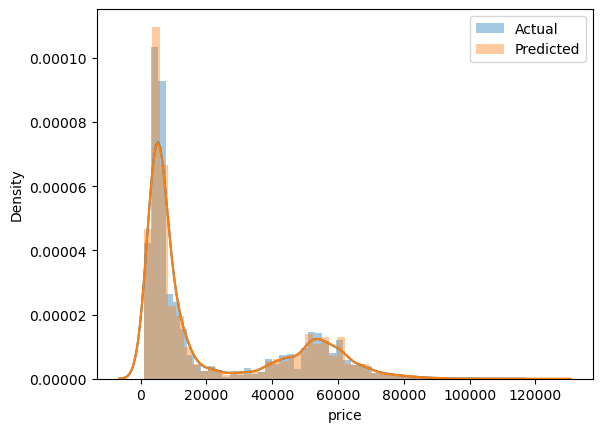

In [89]:
sns.distplot(y_test, label = 'Actual')
sns.distplot(y_preddt, label = 'Predicted')
plt.legend()

# Random Forest Regressor

In [92]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
y_predrf = rf.predict(x_test)

In [93]:
r2 = r2_score(y_test,y_predrf)*100
mae = mean_absolute_error(y_test,y_predrf)
mape= mean_absolute_percentage_error(y_test,y_predrf)
mse = mean_squared_error(y_test,y_predrf)
rmse =root_mean_squared_error(y_test,y_predrf)

In [94]:
r2

98.50817573502026

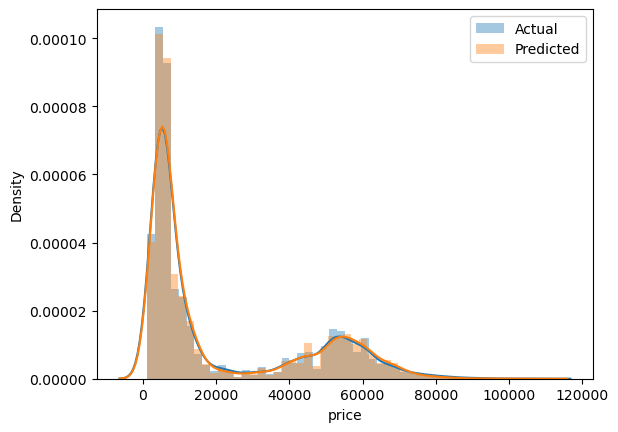

In [97]:
sns.distplot(y_test, label = 'Actual')
sns.distplot(y_predrf, label = 'Predicted')
plt.legend()